In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

In [2]:
mnist = MNIST('./data')
images, labels = mnist.load_training()

labels = np.array(labels)
images = np.array(images).astype('float32') / 255
images2d = images.reshape([-1, 28, 28])

In [3]:
def batch(data, index, batch_size):
    offset = batch_size * index
    return data[offset:offset + batch_size]

5


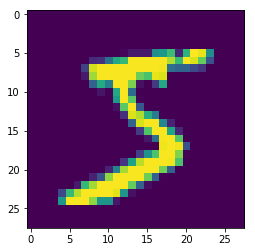

0


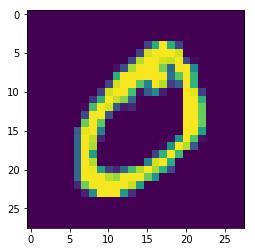

4


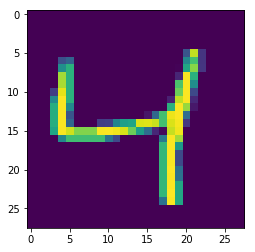

1


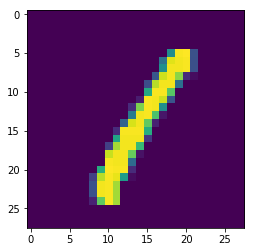

9


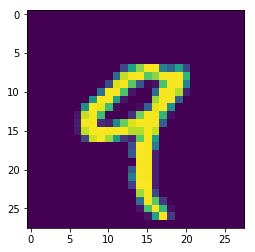

In [4]:
for i in range(5):
    print(labels[i])
    plt.imshow(images2d[i])
    plt.show()

In [5]:
x = tf.placeholder(tf.float32, [None, 28, 28])
z = tf.placeholder(tf.int64, [None])
keep_prob = tf.placeholder(tf.float32)

In [6]:
c1_k = 16
c2_k = 32
fc_k = 1024

In [7]:
input = tf.reshape(x, [-1, 28, 28, 1])

# Helpers

def conv(x, w, b):
    return tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME') + b

def pool(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Convolution/Polling Layer 1

c1_w = tf.Variable(tf.truncated_normal([5, 5, 1, c1_k], stddev=0.1))
c1_b = tf.Variable(tf.truncated_normal([c1_k], stddev=0.1))
c1_y = tf.nn.relu(conv(input, c1_w, c1_b))

p1_y = pool(c1_y)

# Convolution/Polling Layer 2

c2_w = tf.Variable(tf.truncated_normal([5, 5, c1_k, c2_k], stddev=0.1))
c2_b = tf.Variable(tf.truncated_normal([c2_k], stddev=0.1))
c2_y = tf.nn.relu(conv(p1_y, c2_w, c2_b))

p2_y = pool(c2_y)

In [8]:
p1_y.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(16)])

In [9]:
p2_y.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(32)])

In [10]:
# Fully Connected

fc_size = (28 // 4) * (28 // 4) * c2_k
fc_y = tf.reshape(p2_y, [-1, fc_size])

In [11]:
fc_y.shape

TensorShape([Dimension(None), Dimension(1568)])

In [12]:
# Hidden Layer

w1 = tf.Variable(tf.truncated_normal([fc_size, fc_k], stddev=0.1))
b1 = tf.Variable(tf.truncated_normal([fc_k], stddev=0.1))
y1 = tf.nn.relu(tf.matmul(fc_y, w1) + b1)

drop_y = tf.nn.dropout(y1, keep_prob)

# Ouput Layer

w = tf.Variable(tf.truncated_normal([fc_k, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))
y = tf.nn.softmax(tf.matmul(drop_y, w) + b)

In [13]:
y.shape

TensorShape([Dimension(None), Dimension(10)])

In [14]:
t = tf.one_hot(z, 10)

cross_entropy = -tf.reduce_sum(t * tf.log(y), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.AdamOptimizer(0.001).minimize(loss)

In [15]:
correct = tf.equal(tf.argmax(y, axis=1), z)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [16]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: images2d[:1000],
    z: labels[:1000],
    keep_prob: 1.0
}

batch_size = 100

print(session.run(accuracy, feed_dict=test_data))

for i in range(20):
    for j in range(10):
        data = {
            x: batch(images2d[1000:], i * 10 + j, batch_size),
            z: batch(labels[1000:], i * 10 + j, batch_size),
            keep_prob: 0.5
        }
        session.run(train, feed_dict=data)
    print(session.run(accuracy, feed_dict=test_data))

0.069
0.759
0.844
0.889
0.882
0.913
0.927
0.939
0.94
0.948
0.942
0.933
0.951
0.956
0.965
0.962
0.959
0.959
0.959
0.963
0.957
